In [366]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as dt
import datetime as timedelta
import seaborn as sns

In [367]:
users = pd.read_csv('~/Downloads/relax_challenge/takehome_users.csv', encoding='iso-8859-1')

In [368]:
engagement = pd.read_csv('~/Downloads/relax_challenge/takehome_user_engagement.csv')

In [306]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [307]:
users.shape

(12000, 10)

In [308]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [309]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [310]:
engagement.shape

(207917, 3)

In [311]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [312]:
#Number of users in engagement data set
print('number of users:{}'.format(len(engagement.user_id.unique())))

number of users:8823


In [369]:
#make datetime format
engagement['date_time'] = pd.to_datetime(engagement.time_stamp)

In [370]:
#extract date from datetime
engagement['date'] = engagement.date_time.dt.date

#### Since the question is about users who has logged into the product in 7-days period therefore we should remove users who did not log in at least 3 times.

In [371]:
boolean = pd.Series.to_dict(engagement.groupby('user_id').count().date >= 3)
boolean

{1: False,
 2: True,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 10: True,
 11: False,
 13: False,
 14: False,
 17: False,
 19: False,
 20: True,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 33: True,
 36: False,
 37: False,
 41: False,
 42: True,
 43: True,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: True,
 51: False,
 53: True,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: True,
 60: True,
 61: False,
 63: True,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: True,
 72: False,
 73: False,
 74: True,
 75: False,
 76: False,
 77: True,
 78: False,
 80: True,
 81: True,
 82: True,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: False,
 89: False,
 90: False,
 91: False,
 92: False,
 94: False,
 95: True,
 96: False,
 97: False,
 98: False,
 99: False,
 100: False,
 101: False,
 103: False,
 105: False,
 106: False,
 

In [372]:
engagement = engagement.copy()
engagement['keep_user'] = engagement.user_id.map(boolean)
engagement.head(15)

,time_stamp,user_id,visited,date_time,date,keep_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,False
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True


In [373]:
engagement = engagement[engagement.keep_user == True]

In [374]:
print('# of users with at least 3 login days:{}'.format(len(engagement.groupby('user_id')['keep_user'].count())))

# of users with at least 3 login days:2248


#### Now we should parse through all the dates for the users who have more than 3 login dyas within 7-days timespan, to do this we look at the first login  date and then 2 login timespan if it was within 7 days then means the second was in the timespan too and it satisfies the criteria then returns true and if not look at the second timestamp login and do the same thing and if noe of the dates satisfy the criteria then returns false.

In [375]:
#Create a list of all users
user_ids = [k for k,v in engagement.groupby('user_id')]

In [376]:
grouped = engagement.groupby('user_id')['date']

In [377]:
def valid_login(x):
    '''This function takes in a list of login time stamps and returns whether or not there are at least 3 logins
    in a one week time span
    
    Inputs
    x --> a list of dates
    
    Outputs
    Boolean True or False'''
    
    length = len(x)
    idx = 0
    # loop through each date in the list starting with the first date and ending at 2nd to the last date in the list
    while idx < (length - 2):
        #Check if the timestamp that is 2 timestamps away from the current is greater than 7 days
        if (x[idx + 2] - x[idx]).days > 7:
            #Increment idx to make the next timestamp in the list the referenced timestamp
            idx += 1
            continue
            
        else:
            #return true that the critera is satisfied
            return True  
    #after looping through all timestamps return false since the critera isn't satisfied
    return False

In [378]:
def check_criteria(grouped, users):
    '''This function has two inputs; a groupby dataframe and a list of users and returns a dictionary with 
    user_ids as keys and a boolean (True or False) as the value indicating if that user satisfies the 
    "adopted user" critera
    
    Inputs
    grouped --> dataframe groupedby user_ids and column of date_time
    
    Outputs
    bool_dict --> Dictionary with user_ids as the keys and boolean True or False as the value
    '''
    # Create an empty dictionary to update
    bool_dict = {}
    
    # Create a list of lists of all the dates for each user
    dates = [list(grouped.get_group(x)) for x in users]
    #Iterate through each list of dates for the corresponding user and check criteria
    for pos,user in enumerate(users):
        #update dictionary
        bool_dict[user] = valid_login(dates[pos])
    return bool_dict

In [379]:
bool_dict = check_criteria(grouped,user_ids)
bool_dict

{2: True,
 10: True,
 20: True,
 33: True,
 42: True,
 43: True,
 50: True,
 53: True,
 59: False,
 60: True,
 63: True,
 69: True,
 74: True,
 77: False,
 80: True,
 81: True,
 82: True,
 87: True,
 95: False,
 126: False,
 133: True,
 135: True,
 136: False,
 141: True,
 142: False,
 146: True,
 153: True,
 160: True,
 165: True,
 168: True,
 171: False,
 172: True,
 174: True,
 185: True,
 188: True,
 197: True,
 200: True,
 202: True,
 203: True,
 209: True,
 214: True,
 221: False,
 230: True,
 241: False,
 245: True,
 247: True,
 251: False,
 263: True,
 265: True,
 275: True,
 277: False,
 280: True,
 283: True,
 297: True,
 298: True,
 305: True,
 310: True,
 311: True,
 321: True,
 322: True,
 330: False,
 337: False,
 341: True,
 345: True,
 347: True,
 351: True,
 362: True,
 363: True,
 367: False,
 370: True,
 375: False,
 382: False,
 383: True,
 390: False,
 397: True,
 398: False,
 401: True,
 417: False,
 418: True,
 430: True,
 445: True,
 450: True,
 455: False,
 460

#### Now we should put the criteria in engagement dataframe. 

In [380]:
engagement = engagement.drop('keep_user', axis=1)

In [381]:
engagement['keep_user'] = engagement.user_id.map(bool_dict)
engagement.head(10)

,time_stamp,user_id,visited,date_time,date,keep_user
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True
10,2014-02-13 03:45:04,2,1,2014-02-13 03:45:04,2014-02-13,True


In [382]:
#Remove user with keep_user value False
engagement1 = engagement[engagement.keep_user == True]
print('Number of "Adopted Users": {}'.format(len(engagement1.user_id.unique())))

Number of "Adopted Users": 1656


#### Now we can use unique value for user_id who have Adopted in users data set and start our investigation for prediction.

In [383]:
# Create a list of all adopted user id's
adopted_users = engagement1.user_id.unique()

In [384]:
engagement = engagement.drop('keep_user', axis=1)

In [385]:
def keep_user(x, users):
    if x in users:
        return 1
    else:
        return 0

In [386]:
# Mark those users who were adopted in the overall dataframes
users['adopted_user'] = users.object_id.apply(lambda x: keep_user(x, adopted_users))

In [332]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [387]:
engagement['adopted_user'] = engagement.user_id.apply(lambda x: keep_user(x, adopted_users))

In [389]:
engagement.head()

,time_stamp,user_id,visited,date_time,date,adopted_user
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,1
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,1
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,1
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,1
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,1


In [392]:
adopted_min_login = engagement[engagement.adopted_user == True].groupby('user_id')['date'].count().min()
adopted_max_login = engagement[engagement.adopted_user == True].groupby('user_id')['date'].count().max()
adopted_avg_login = engagement[engagement.adopted_user == True].groupby('user_id')['date'].count().mean()
print(' Login average for adopted users is ',adopted_avg_login, '\n',
      'Maximum number of logins for an adopted user is ',adopted_max_login, '\n',
      'Minimum number of logins for an adopted user is ',adopted_min_login)

 Login average for adopted users is  119.7626811594203 
 Maximum number of logins for an adopted user is  606 
 Minimum number of logins for an adopted user is  3


In [393]:
y = engagement[engagement.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)
x = range(len(engagement[engagement.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)))

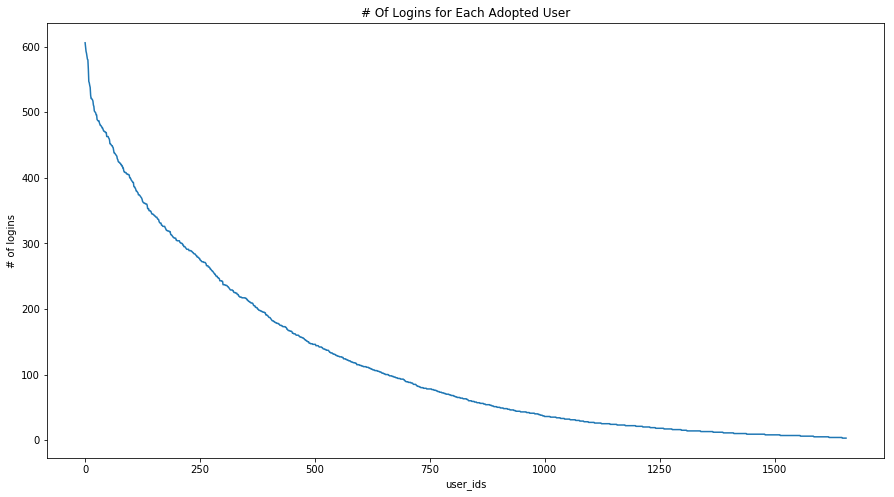

In [394]:
fig = plt.figure(figsize = (15,8))
plt.plot(x,y)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins for Each Adopted User')
plt.show()

In [395]:
unadopted_min_login = engagement[engagement.adopted_user == False].groupby('user_id')['date'].count().min()
unadopted_max_login = engagement[engagement.adopted_user == False].groupby('user_id')['date'].count().max()
unadopted_avg_login = engagement[engagement.adopted_user == False].groupby('user_id')['date'].count().mean()

In [405]:
print(' Login average for unadopted users is ',unadopted_avg_login, '\n',
      'Maximum number of logins for an unadopted user is ',unadopted_max_login, '\n',
      'Minimum number of logins for an unadopted user is ',unadopted_min_login)

 Login average for unadopted users is  4.518581081081081 
 Maximum number of logins for an unadopted user is  15 
 Minimum number of logins for an unadopted user is  3


In [400]:
yu = engagement[engagement.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)
xu = range(len(engagement[engagement.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)))

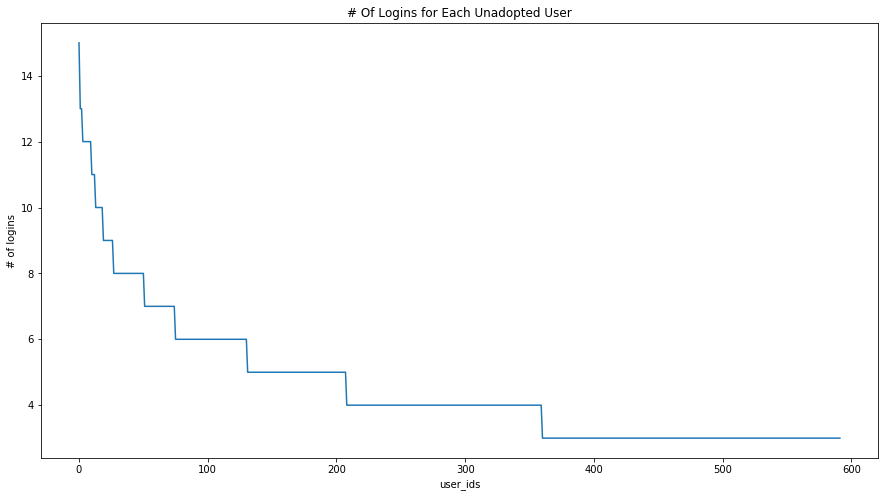

In [401]:
plt.figure(figsize = (15,8))
plt.plot(xu,yu)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins for Each Unadopted User')
plt.show()

#### It shows that predictor for a user being adobted can be number of log in which is obvious but let's do some some investigation.

#### Percentage of adopted vs unadopted users with respect to opting into the mailing list

In [402]:
users.groupby(['opted_in_to_mailing_list','adopted_user'])['object_id'].count() / len(users)

opted_in_to_mailing_list  adopted_user
0                         0               0.64825
                          1               0.10225
1                         0               0.21375
                          1               0.03575
Name: object_id, dtype: float64

#### Percentage of adopted vs unadopted users with respect to their creation source

In [403]:
users.groupby(['creation_source','adopted_user'])['object_id'].count() / len(users)

creation_source     adopted_user
GUEST_INVITE        0               0.149500
                    1               0.030750
ORG_INVITE          0               0.306667
                    1               0.047833
PERSONAL_PROJECTS   0               0.161583
                    1               0.014333
SIGNUP              0               0.148750
                    1               0.025167
SIGNUP_GOOGLE_AUTH  0               0.095500
                    1               0.019917
Name: object_id, dtype: float64

#### Percentage of adopted vs unadopted users with respect to enabled market drip¶

In [404]:
users.groupby(['enabled_for_marketing_drip','adopted_user'])['object_id'].count() / len(users)

enabled_for_marketing_drip  adopted_user
0                           0               0.734083
                            1               0.116583
1                           0               0.127917
                            1               0.021417
Name: object_id, dtype: float64

#### Conclusion<br>Based on the invistigation that we did, the most important indicator is how many time a user logs in and average logs in of unadopted is 4.518 and for adopted is 119.76 which is imbalanced therefore there is no good way to extract meaningful statistic result out of the categorical features.